# 3. Time Series

Time series are possibly the simplest matplotlib visualizations. Although time series are expressive and intuitive visualizations to follow, extracting meaning from them requires interpretation. Multiplex's time series make it easier to highlight the story you want to convey through the plot.

At its most basic, Multiplex's time series performs the exact same function as matplotlib's `plot`: the `TimeSeries` class passes on all arguments and keyword arguments to the `plot` function. This notebook contains a simple running example, plotting the sunrise and sunset in Malta without daylight saving.

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import importlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

First, the sunrise and sunset data will be read from the `data/` directory. The daylight savings time is cancelled out to make for a prettier graph.

In [2]:
sunrise = pd.read_json('data/sunrise.json')

"""
Zero-pad the day and month.
"""
sunrise.day = sunrise.day.astype('str').apply( lambda x: ('0' + x)[-2:])
sunrise.month = sunrise.month.astype('str').apply( lambda x: ('0' + x)[-2:])

"""
Create the date by joining the day, month and year.
"""
sunrise['date'] = sunrise[['day', 'month', 'year']].apply(
    lambda x: '-'.join(x.astype('str')), axis=1
)

"""
Type-cast the date and time.
"""
sunrise.time = pd.to_datetime(sunrise.time, format='%H:%M')
sunrise.time = sunrise.time.dt.time
sunrise.date = pd.to_datetime(sunrise.date, format='%d-%m-%Y')

"""
Cancel out the daylight savings time.
"""
sunrise.time = sunrise.apply(
    lambda x: datetime.time(x.time.hour - 1, x.time.minute) if 
                (x.date >= datetime.datetime(2020, 3, 29)) & 
                (x.date < datetime.datetime(2020, 10, 25)) else x,
    axis=1
).time

sunrise

,month,year,day,time,date
0,01,2020,01,07:12:00,2020-01-01
1,01,2020,02,07:12:00,2020-01-02
2,01,2020,03,07:12:00,2020-01-03
3,01,2020,04,07:12:00,2020-01-04
4,01,2020,05,07:12:00,2020-01-05
...,...,...,...,...,...
361,12,2020,27,07:11:00,2020-12-27
362,12,2020,28,07:11:00,2020-12-28
363,12,2020,29,07:11:00,2020-12-29
364,12,2020,30,07:11:00,2020-12-30


In [3]:
sunset = pd.read_json('data/sunset.json')

"""
Zero-pad the day and month.
"""
sunset.day = sunset.day.astype('str').apply( lambda x: ('0' + x)[-2:])
sunset.month = sunset.month.astype('str').apply( lambda x: ('0' + x)[-2:])

"""
Create the date by joining the day, month and year.
"""
sunset['date'] = sunset[['day', 'month', 'year']].apply(
    lambda x: '-'.join(x.astype('str')), axis=1
)

"""
Type-cast the date and time.
"""
sunset.time = pd.to_datetime(sunset.time, format='%H:%M')
sunset.time = sunset.time.dt.time
sunset.date = pd.to_datetime(sunset.date)

"""
Cancel out the daylight savings time.
"""
sunset.time = sunset.apply(
    lambda x: datetime.time(x.time.hour - 1, x.time.minute) if 
                (x.date >= datetime.datetime(2020, 3, 29)) & 
                (x.date < datetime.datetime(2020, 10, 25)) else x,
    axis=1
).time

sunset

,month,year,day,time,date
0,01,2020,01,16:58:00,2020-01-01
1,01,2020,02,16:59:00,2020-02-01
2,01,2020,03,17:00:00,2020-03-01
3,01,2020,04,16:00:00,2020-04-01
4,01,2020,05,16:01:00,2020-05-01
...,...,...,...,...,...
361,12,2020,27,16:55:00,2020-12-27
362,12,2020,28,16:56:00,2020-12-28
363,12,2020,29,16:56:00,2020-12-29
364,12,2020,30,16:57:00,2020-12-30


Next, we plot the time series. Plotting it is very similar to how you would plot any other time series in matplotlib. However, Multiplex does not favor legends. Instead, line labels are drawn at the end of the time series. That way, you can read the plot as you read the data, rather than keep switching between reading the data and interpreting it with the legend.

Labels can be styled by passing on the `label_style` dictionary. Any parameter accepted by matplotlib's Text can also be passed. Multiplex uses color association to make it easier to read the time series—by default, the label will use the same color as the time series plot.

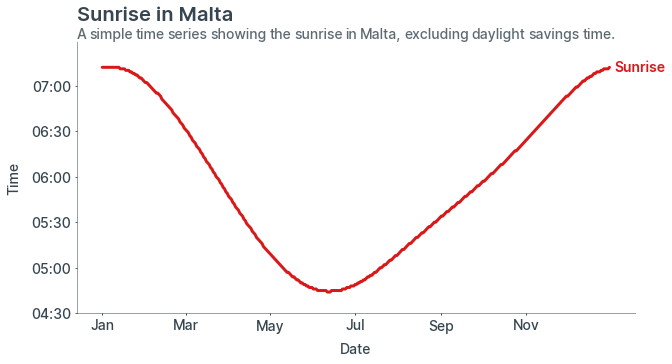

In [4]:
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))

viz = drawable.Drawable(plt.figure(figsize=(10, 5)))

viz.draw_time_series(
    range(0, len(sunrise['date'])), sunrise.time.to_list(),
    label='Sunrise', label_style={ 'fontweight': 'bold' }
)

"""
Show ever second month in the x-axis.
"""
xticks = sunrise.loc[sunrise.day == '01'].copy()[::2]
viz.set_xticks(xticks.index)
viz.set_xticklabels(xticks.date.dt.strftime('%b'))

"""
Show y-ticks every half-hour.
"""
viz.set_yticks([ datetime.time(hour, minute) for minute in [ 30, 0 ] for hour in [ 4, 5, 6, 7 ]])
viz.set_ylim(datetime.time(4, 30), datetime.time(7, 29))

viz.set_xlabel('Date')
viz.set_ylabel('Time')

viz.set_title('Sunrise in Malta', loc='left')
viz.set_caption('A simple time series showing the sunrise in Malta, excluding daylight savings time.')
plt.show()